In [1]:
%matplotlib inline

%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np

import xarray as xr

import regionmask

import pandas as pd

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import cartopy.feature as cfeat
import matplotlib.patches as mpatches
import cmocean

import glob


import sys
sys.path.append('../')
import utils
import plotting

np.seterr(invalid='ignore'); # disable a warning from matplotlib and cartopy

# Import Data

### Load in GEOS Chem Runs made from File Creation Notebook, Load in HEMCO Emissions Files

In [2]:
ds= xr.open_dataset('./final_data/ds_PM_O3_daily.nc4')
ds_o3 = xr.open_zarr('./final_data/o3_mortalities.zarr/')

#create seasonal averages-- summer ozone is 8 hour afternoon, winter ozone is daily, pm is daily
ds_seasonal = utils.season_mean(ds)
ds_seasonal = ds_seasonal
ds_o3 = ds_o3.sel(time = ds_o3.time.dt.hour.isin([np.arange(10,18)])).groupby("time.season").mean()*1e9 #convert to ppb
ds_o3 = ds_o3.rename({'SpeciesConc_O3':'O3'})['O3']



#combine the two datasets
ds_seasonal['O3'].loc[ds_seasonal['season'] == 'JJA'] = ds_o3 #override the summer average with the 8 hour afternoon average
ds_seasonal['PM25'].attrs = {'units':r'$u$g/m3'}
ds_seasonal['O3'].attrs = {'units':'ppb'}

#list of model names
model_names = ds['model_name'].values


# Plots

## US, concentrations

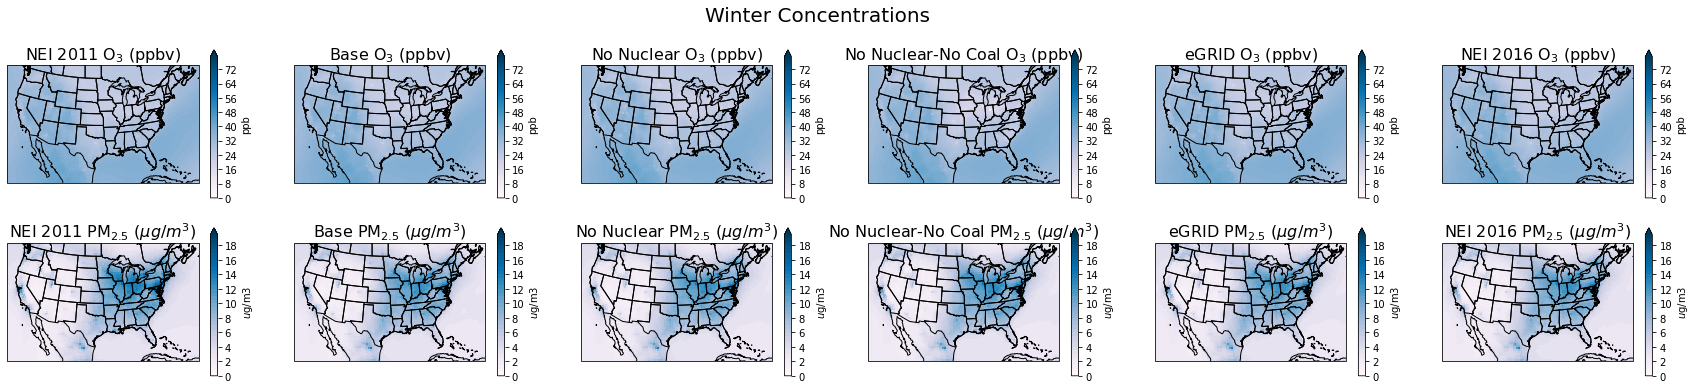

In [3]:
plotting.concentration_plot_seasonal(ds_seasonal = ds_seasonal, species_names = ['O3','PM25'], season = 'DJF', model_names = model_names,  cmap = plotting.cmap_conc,
                        lat_lon = [-120,-70,20,50], shrink_cbar = 1,
                       figsize = [30,6])
plt.suptitle('Winter Concentrations', fontsize = 20);
plt.savefig('./Figures/supp_winter_conc.png',bbox_inches = 'tight', dpi = 150)

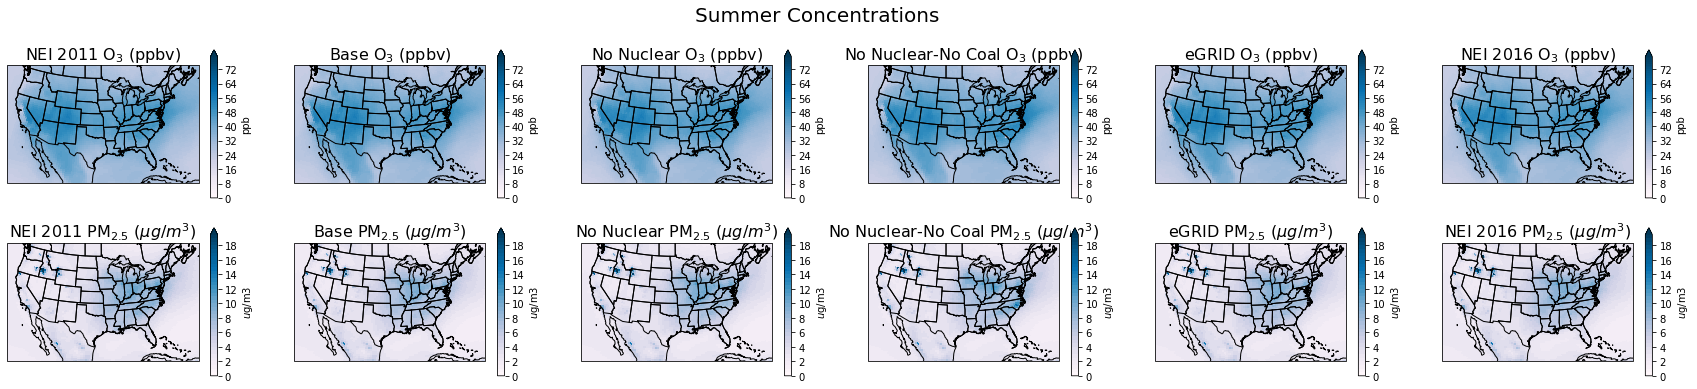

In [4]:
plotting.concentration_plot_seasonal(ds_seasonal = ds_seasonal, species_names = ['O3','PM25'], season = 'JJA', model_names = model_names,  cmap = plotting.cmap_conc,
                        lat_lon = [-120,-70,20,50], shrink_cbar = 1,
                       figsize = [30,6])
plt.suptitle('Summer Concentrations', fontsize = 20);
plt.savefig('./Figures/supp_summer_conc.png',bbox_inches = 'tight', dpi = 150)

## US, differences Normal and No Nuclear

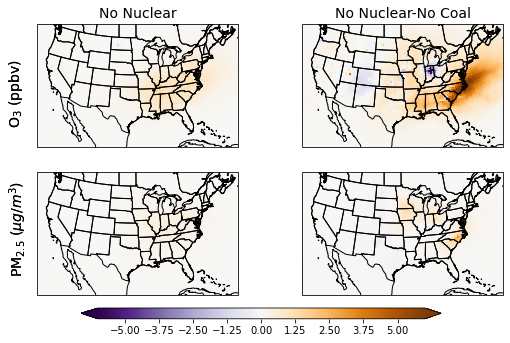

In [98]:
#PM2.5
plotting.concentration_plot_seasonal_dif_models(ds_seasonal = ds_seasonal, polls = ['O3','PM25'], cmap = 'PuOr_r', 
                                         mod_base = 'normal_NA', mod_deltas = ['nonuc_NA', 'nonuc_coal_NA'],
                   rows = 2, columns = 2, levels = np.arange(-6,6.05,.05), lat_lon = [-120,-70,20,50],
                   figsize = [10, 5], extension = 'both')
plt.savefig('./Figures/PM_O3_comparison.png', bbox_inches = 'tight', dpi = 150)

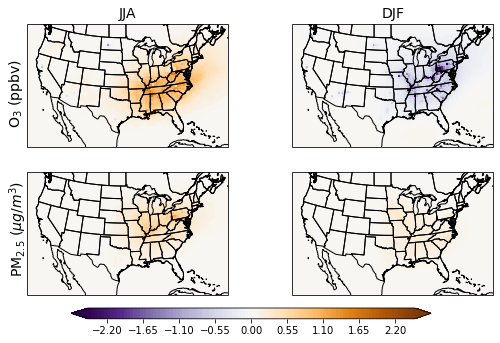

In [93]:
plotting.concentration_plot_seasonal_dif(ds_seasonal = ds_seasonal, seasons = ['JJA','DJF'], species_names = ['O3','PM25'], cmap = 'PuOr_r', 
                                         mod_base = 'normal_NA', mod_delta = 'nonuc_NA',
                   rows = 2, columns = 2, levels = np.arange(-2.5,2.55,.05), lat_lon = [-120,-70,20,50],
                   figsize = [10, 5], extension = 'both')
plt.savefig('./Figures/PM_O3_dif_nonuc.png', bbox_inches = 'tight', dpi = 150)

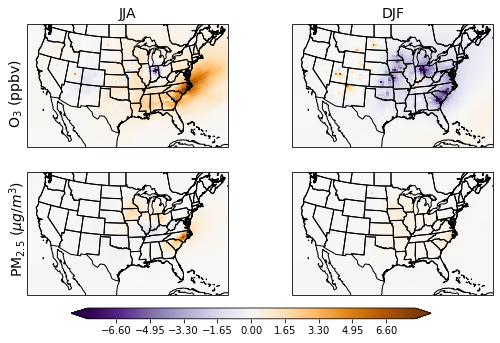

In [94]:
plotting.concentration_plot_seasonal_dif(ds_seasonal = ds_seasonal, seasons = ['JJA','DJF'], species_names = ['O3','PM25'], cmap = 'PuOr_r', 
                                         mod_base = 'normal_NA', mod_delta = 'nonuc_coal_NA',
                   rows = 2, columns = 2, levels = np.arange(-8,8.05,.05), lat_lon = [-120,-70,20,50],
                   figsize = [10, 5], extension = 'both')
plt.savefig('./Figures/PM_O3_dif_nocoal.png', bbox_inches = 'tight', dpi = 150)

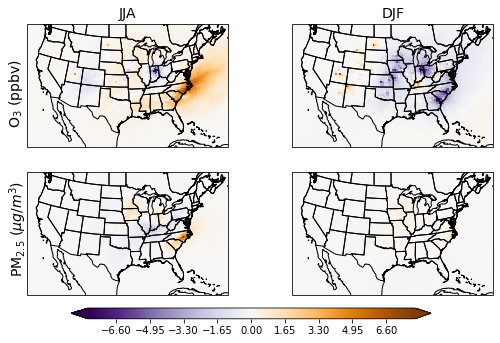

In [95]:
plotting.concentration_plot_seasonal_dif(ds_seasonal = ds_seasonal, seasons = ['JJA','DJF'], species_names = ['O3','PM25'], cmap = 'PuOr_r', 
                                         mod_base = 'nonuc_NA', mod_delta = 'nonuc_coal_NA',
                   rows = 2, columns = 2, levels = np.arange(-8,8.05,.05), lat_lon = [-120,-70,20,50],
                   figsize = [10, 5], extension = 'both')
plt.savefig('./Figures/PM_O3_dif_nocoal-nonuc.png', bbox_inches = 'tight', dpi = 150)